# COSC2789 Practical Data Science
# Assignment 2: Data Modeling
**Group 4**
- Name & ID here

**Goal**: To classify income range of survey respondents. 

**Performance measures** 
- Accuracy 
- Recall 
- F1 score 
- AUC ROC 

**Data description** 
*The dataset contains responses from the 2020 Stack Overflow Developer survey, which is among the largest and most comprehensive survey of software developers.*

## Task 1.1 Data Retrieving and Cleaning 

### Setting up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
# Get the data
url = 'https://raw.githubusercontent.com/tratn/PDS-A3/main/survey_results_public.csv'
survey = pd.read_csv(url, sep=',')

In [3]:
survey.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [5]:
# generate descriptive stats 
survey.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [6]:
preprocess = survey.copy()

### Missing values

In [7]:
with pd.option_context('display.max_rows', None):
  display(preprocess.isnull().sum())

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToo

**Mandatory columns** 

- There are a lot of missing values in columns that correspond to mandatory questions. Since no significant differences can be observed between respondents with and without missing data, it is likely that the data are **missing completely at random**. 
- As such, it is difficult to infer what the answers might be, hence we will drop the missing data on these columns 

In [8]:
# List of mandatory columns. 
# Respodent ID is assigned automatically, hence not included in this list 
mandatory_cols = ['MainBranch', 'Hobbyist', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'JobSeek']
preprocess.dropna(subset=mandatory_cols, inplace=True)

# verify the change
preprocess.loc[:, mandatory_cols].isnull().sum()

MainBranch        0
Hobbyist          0
Country           0
CurrencyDesc      0
CurrencySymbol    0
JobSeek           0
dtype: int64

**Optional columns**

*Compensation*: `CompFreq`, `CompTotal`, `ConvertedComp`
- On one hand, compensation frequency must be specified in order to calculate the total compensation amount. On the other hand, it isn't very useful to know the frequency but not the amount of compensation. 
- Therefore, we will drop any entries that contain missing values on `CompFreq`, then `CompTotal`


In [9]:
compensation_cols = ['CompTotal', 'CompFreq', 'ConvertedComp']
# drop missing values for CompFreq
preprocess.dropna(subset=['CompFreq', 'CompTotal'], axis=0, inplace=True)

# verify the change
preprocess.loc[:, compensation_cols].isnull().any()

CompTotal        False
CompFreq         False
ConvertedComp     True
dtype: bool

In [10]:
# check for remaining missing values 
preprocess[preprocess.loc[:, 'ConvertedComp'].isnull() == True]

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7370,7400,"I am not primarily a developer, but I write co...",Yes,69.0,Younger than 5 years,Yearly,1000.0,NaN,Angola,e\tCook Islands dollar,...,Easy,Too long,NaN,NaN,NaN,NaN,NaN,168.0,Less than 1 year,Less than 1 year
23788,23878,I am a developer by profession,Yes,36.0,11,Yearly,979000.0,NaN,Norway,e\tCook Islands dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",React.js,Angular;jQuery;React.js;Spring,Just as welcome now as I felt last year,40.0,13,25
47224,48212,"I am not primarily a developer, but I write co...",Yes,33.0,12,Monthly,10000.0,NaN,Denmark,e\tFaroese krona,...,Neither easy nor difficult,Appropriate in length,No,"A humanities discipline (such as literature, h...",Gatsby;React.js;Vue.js,ASP.NET;Drupal;Gatsby;jQuery;React.js,Somewhat less welcome now than last year,27.0,5,3
55973,57095,I am a developer by profession,Yes,NaN,18,Monthly,5000.0,NaN,India,e\tCook Islands dollar,...,Easy,Too short,No,Mathematics or statistics,Angular;Express;React.js,Angular;Express;React.js,A lot less welcome now than last year,10.0,7,2


It seems that the compensation are paid in more rare types of currency, hence the missing values on `ConvertedComp`. 
- After some research, we found that Faroese krona has the same fixed exchange rate as Danish Krone (1 to 1) and so we will fill the converted compensation based on that exchange rate. 
- For Cook Island dollar, we weren't able to find or infer the exchange rate, so the best guess is to drop them. 

In [11]:
# find the exchange rate for Danish krone 
preprocess[preprocess.loc[:, 'CurrencySymbol'] == 'DKK'].head(1)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
755,757,I am a developer by profession,Yes,55.0,23,Monthly,80000.0,138936.0,Denmark,Danish krone,...,Easy,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Angular,ASP.NET;jQuery,Just as welcome now as I felt last year,37.0,35,28


In [12]:
dkk_to_usd = 138936.0/80000.0
converted_comp = preprocess.loc[preprocess.index.isin([47224]), 'CompTotal']*dkk_to_usd

# fill the missing converted compensation  
preprocess.loc[preprocess.index.isin([47224]), 'ConvertedComp'] = converted_comp

# while we're at it, let's fix the currency symbol too 
preprocess.loc[preprocess.index.isin([47224]), 'CurrencyDesc'] = 'Faroese krona'
preprocess.loc[preprocess.index.isin([47224]), 'CurrencySymbol'] = 'KR'

In [13]:
# drop missing values for Cook Island dollar
cols_to_drop = preprocess[preprocess.loc[:, 'ConvertedComp'].isnull() == True].index.tolist()
preprocess.drop(index=cols_to_drop, inplace=True)

*Age & working hours*
- `Age` & `WorkWeekHrs`: these 2 columns are of numerical type, we will impute the missing values with median. 

In [14]:
# fill missing age and working hours with median 
med_age = preprocess['Age'].median()
med_hour = preprocess['WorkWeekHrs'].median()
preprocess.fillna({'Age':med_age, 'WorkWeekHrs':med_hour}, inplace=True)

*Remaining columns* 

- For the remaining columns, we will fill missing values with the value 'NotMentioned'. This is because these columns are of categorical type and survey respondents have the option to leave these questions blank if they wish to not answer.

In [15]:
cat_cols = preprocess.select_dtypes(include=[object]).columns.tolist()
preprocess[cat_cols] = preprocess[cat_cols].fillna(value='NotMentioned')

In [16]:
# verify the change
with pd.option_context('display.max_rows', None):
  display(preprocess.isnull().sum())

Respondent                      0
MainBranch                      0
Hobbyist                        0
Age                             0
Age1stCode                      0
CompFreq                        0
CompTotal                       0
ConvertedComp                   0
Country                         0
CurrencyDesc                    0
CurrencySymbol                  0
DatabaseDesireNextYear          0
DatabaseWorkedWith              0
DevType                         0
EdLevel                         0
Employment                      0
Ethnicity                       0
Gender                          0
JobFactors                      0
JobSat                          0
JobSeek                         0
LanguageDesireNextYear          0
LanguageWorkedWith              0
MiscTechDesireNextYear          0
MiscTechWorkedWith              0
NEWCollabToolsDesireNextYear    0
NEWCollabToolsWorkedWith        0
NEWDevOps                       0
NEWDevOpsImpt                   0
NEWEdImpt     

### Whitespaces/string manipulation


In [17]:
# remove whitespace
preprocess = preprocess.apply(lambda x: x.str.strip() if x.dtype == "object" else x)   
# transform letter to lowercase 
preprocess = preprocess.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

### Extreme values 

In [18]:
# check for distribution 
num_cols = preprocess.select_dtypes(exclude=['object', 'bool'])
num_cols.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,33779.000000,33779.000000,3.377900e+04,3.377900e+04,33779.000000
mean,29069.657479,31.960526,3.289355e+242,1.037774e+05,40.733636
std,18621.806400,8.225053,inf,2.261110e+05,17.554454
min,8.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,13280.000000,26.000000,2.000000e+04,2.515150e+04,40.000000
50%,26463.000000,30.000000,6.300000e+04,5.404900e+04,40.000000
75%,47221.500000,35.000000,1.250000e+05,9.500000e+04,42.000000
max,65630.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


- `Respondent` & `CompTotal`: These two columns are of little importance for our final analysis, so we will leave them as it. Specifically, `Respondent` is just the ID of survey participants, while `CompTotal` includes compensation of varied currency.
- `Age` & `WorkWeekHrs`: There are several extreme (and unreasonable) values on these two columns that we will have to deal with. For example, the maximum value for Age is 279 which is questionable. Similarly, the maximum value for number of working hours per week is 475 hours, which is wild since a week only has 168 hours. 
- `ConvertedComp`: Because we are interested in classifying income range, we will divide the values in this column into 4 categories: **< 25k, < 50k, < 100k, > 100k**

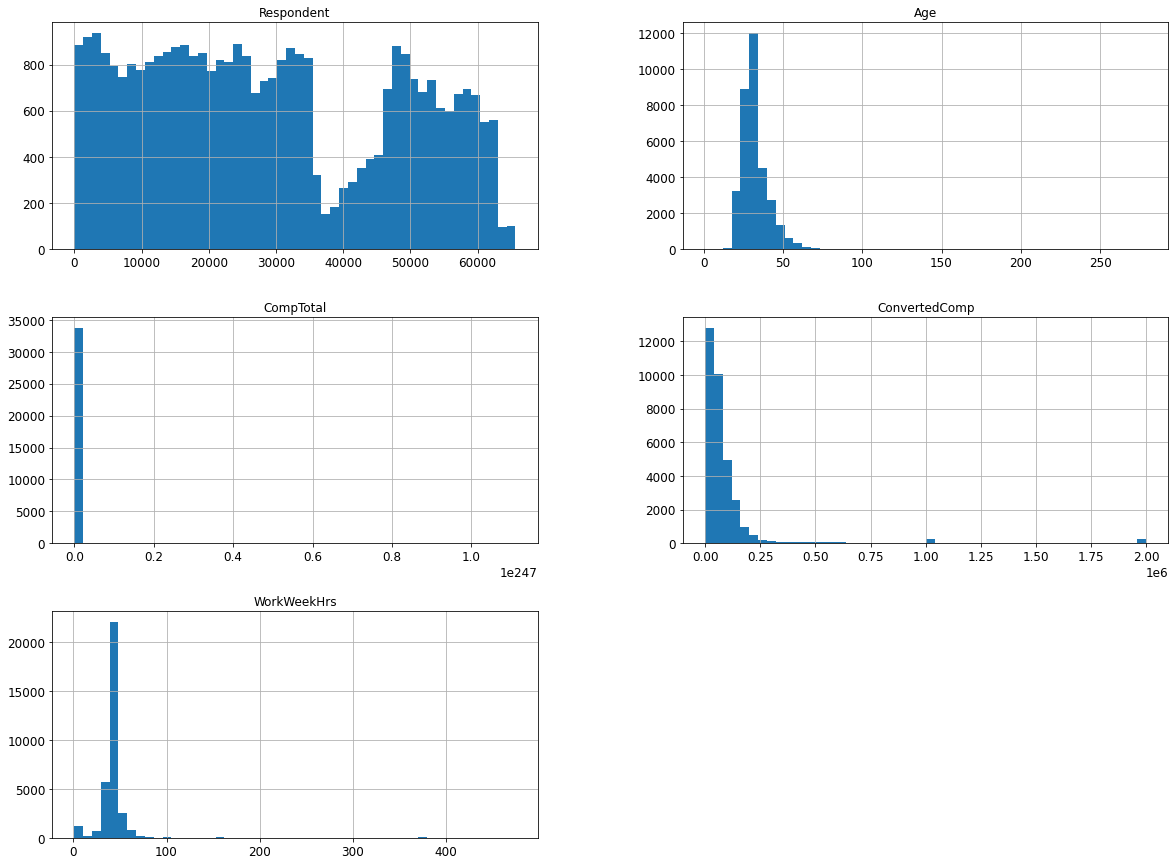

In [19]:
# Remove extreme values for Age and WorkWeekHrs
preprocess.drop(preprocess.loc[preprocess['Age']==279].index, inplace=True)
preprocess.drop(preprocess.loc[preprocess['WorkWeekHrs']>(24*7)].index, inplace=True)

# Check for distribution again 
num_cols.hist(bins=50,figsize=(20,15))
plt.show()

In [20]:
# Create categories for compensation 
# preprocess["ConvertedComp"] = pd.cut(preprocess["ConvertedComp"],
#                             bins=[0, 25000, 50000, 100000, np.inf], 
#                             labels=['<25k', '<50k', '<100k', '>100k'],
#                             include_lowest=True)

In [21]:
# preprocess['ConvertedComp'].hist()

## Task 1.2 Data Exploration

### Graph 1:

### Graph 2:

### Graph 3:

## Task 2 Data Modeling


### 2.1 Feature Engineering

#### Cast Age1stCode, YearsCode, YearsCodePro to 'float64' type

In [22]:
preprocess['Age1stCode'] = preprocess['Age1stCode'].replace("younger than 5 years", "4")
preprocess['Age1stCode'] = preprocess['Age1stCode'].replace("older than 85", "86")
preprocess['Age1stCode'] = preprocess['Age1stCode'].replace("notmentioned", "14")

preprocess['YearsCode'] = preprocess['YearsCode'].replace("less than 1 year", "0.5")
preprocess['YearsCode'] = preprocess['YearsCode'].replace("more than 50 years", "51")
preprocess['YearsCode'] = preprocess['YearsCode'].replace("notmentioned", "10")

preprocess['YearsCodePro'] = preprocess['YearsCodePro'].replace("less than 1 year", "0.5")
preprocess['YearsCodePro'] = preprocess['YearsCodePro'].replace("more than 50 years", "51")
preprocess['YearsCodePro'] = preprocess['YearsCodePro'].replace("notmentioned", "3")

In [23]:
for col in ['Age1stCode', 'YearsCode', 'YearsCodePro']:
    preprocess[col] = preprocess[col].astype('float64')

#### Handle impossible values and outliers
- The Age of Coding The First Time should not be greater than the Age
- Years of Coding Professionally should not be greater than Years of Coding 
- I will drop rows that contain these impossible values

In [24]:
preprocess.drop(preprocess[preprocess['Age1stCode'] > preprocess['Age']].index, inplace = True)
preprocess.drop(preprocess[preprocess['YearsCodePro'] > preprocess['YearsCode']].index, inplace = True)

In [25]:
outliers_df = preprocess.loc[(preprocess['Age'] > 80) | (preprocess['Age1stCode'] > 75)]
preprocess.drop(outliers_df.index, inplace = True)

In [26]:
preprocess[preprocess['YearsCode'] > preprocess['Age']]
preprocess.loc[preprocess['YearsCode'] > preprocess['Age'], ['Age']] = preprocess['YearsCode'] + preprocess['Age1stCode']

#### Add some new features

In [27]:
import re

def count_unique_value(row):
    values = re.split(';', row)
        
    return len(values)

In [28]:
preprocess['Database_Count'] = preprocess['DatabaseWorkedWith'].apply(lambda x: count_unique_value(x))
preprocess['Lang_Count'] = preprocess['LanguageWorkedWith'].apply(lambda x: count_unique_value(x))
preprocess['Misc_Count'] = preprocess['MiscTechWorkedWith'].apply(lambda x: count_unique_value(x))
preprocess['Platform_Count'] = preprocess['PlatformWorkedWith'].apply(lambda x: count_unique_value(x))
preprocess['Webframework_Count'] = preprocess['WebframeWorkedWith'].apply(lambda x: count_unique_value(x))
preprocess['Total_Count'] = preprocess['Database_Count'] + preprocess['Lang_Count'] + preprocess['Misc_Count'] + preprocess['Platform_Count'] + preprocess['Webframework_Count']

In [29]:
# preprocess["Description"] = preprocess["Gender"].astype(str) + " "  + preprocess["DevType"].astype(str) + " "  + preprocess["JobFactors"].astype(str)

In [30]:
# cols = ['Age', 'Age1stCode', 'WorkWeekHrs', 'YearsCode', 'Lang_Count', 'Misc_Count', 'Platform_Count']
# sns.pairplot(preprocess[cols], height = 2.5, kind='scatter', diag_kind='hist')

#### Correlation Analysis

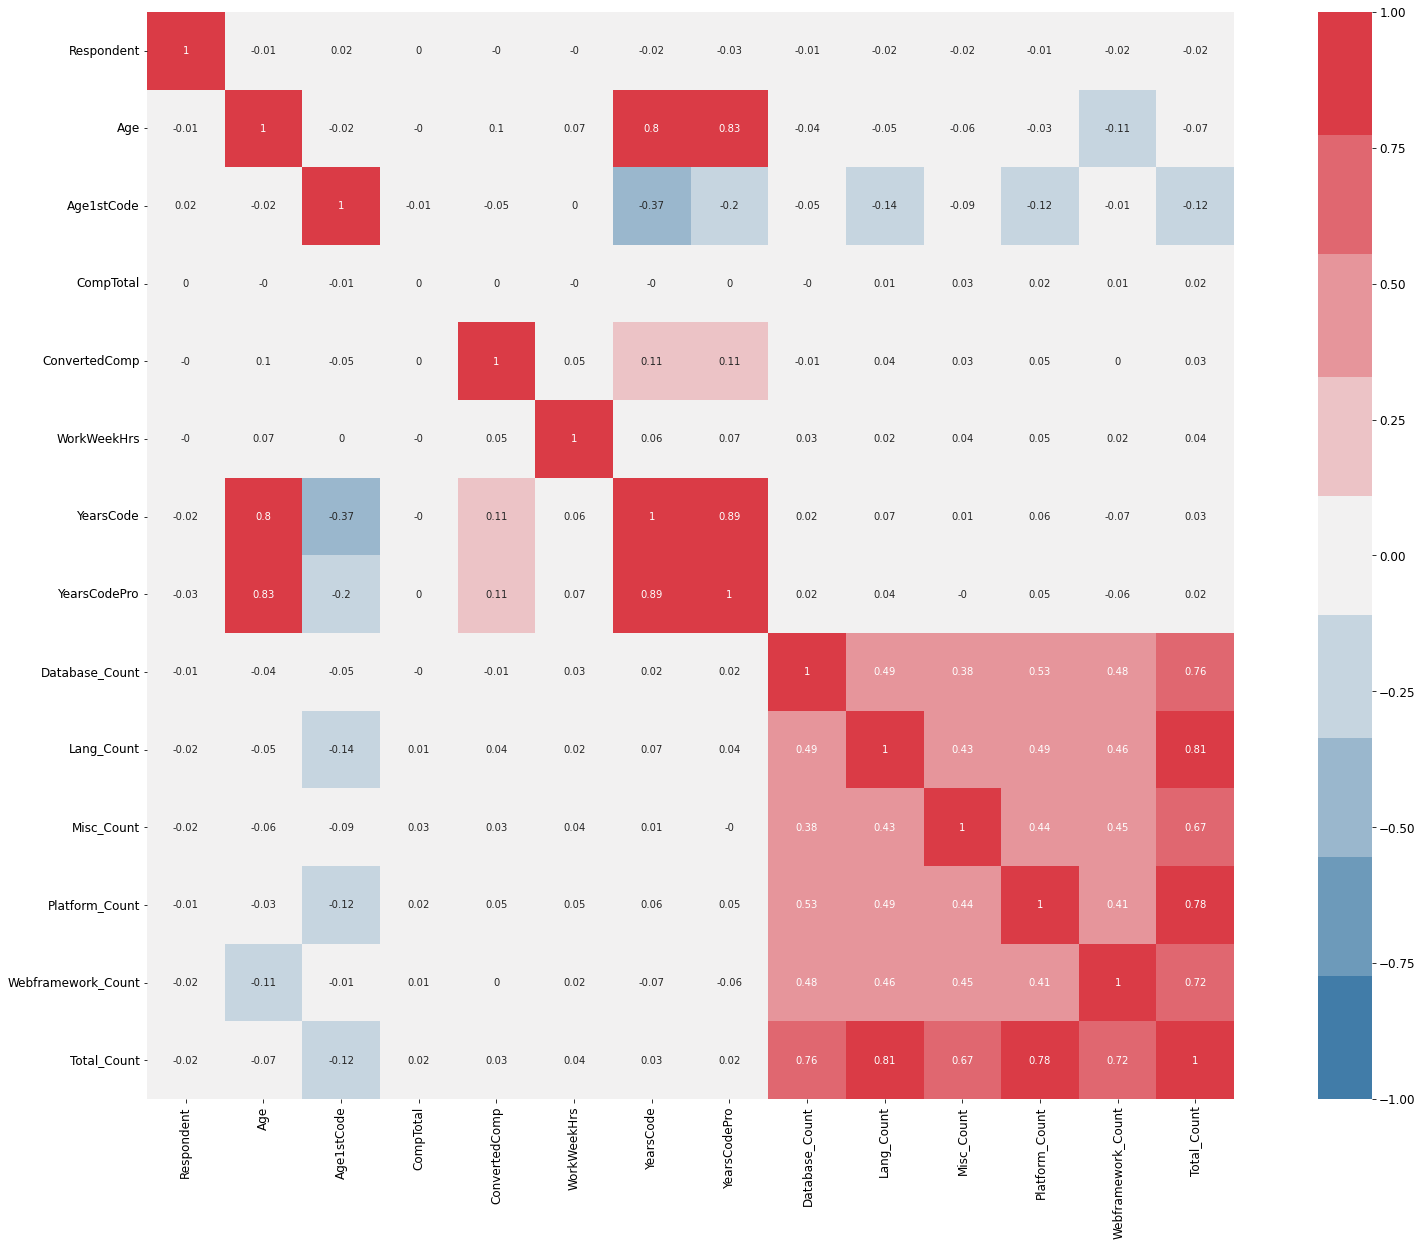

In [31]:
plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(preprocess.corr().round(2), annot=True, vmin=-1, vmax=1, center=0,
            square=True, cmap = sns.diverging_palette(240, 10, n=9))
plt.show()

- YearsCode and YearsCodePro are highly correlated, I will use 1 feature for training model
- Respondent and CompTotal columns are not correlated to ConvertedComp, I will not use them for the training model

#### Feature selection

In [32]:
cor = preprocess.corr()
# Correlation with output variable
cor_target = abs(cor["ConvertedComp"])

# Selecting highly correlated features
cor_features = cor_target[cor_target > 0.01]
num_cols = cor_features.index.to_list()
num_cols

['Age',
 'Age1stCode',
 'ConvertedComp',
 'WorkWeekHrs',
 'YearsCode',
 'YearsCodePro',
 'Lang_Count',
 'Misc_Count',
 'Platform_Count',
 'Total_Count']

In [33]:
# Create categories for compensation 
preprocess["ConvertedComp"] = pd.cut(preprocess["ConvertedComp"],
                            bins=[0, 24000, 48000, 96000, np.inf], 
                            labels=['<24k', '<48k', '<96k', '>96k'],
                            include_lowest=True)

In [34]:
preprocess['ConvertedComp'].value_counts()

<96k    10135
>96k     8276
<24k     8043
<48k     6944
Name: ConvertedComp, dtype: int64

In [35]:
num_feats = ['Age', 'Age1stCode', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro', 'Lang_Count', 'Misc_Count', 'Platform_Count', 'Total_Count']

In [36]:
cate_feats = ['MainBranch',
              'Hobbyist',
              'Country', 
              'EdLevel',
              'Employment',
              'JobSat',
              'JobSeek',
              'NEWEdImpt',
              'NEWLearn',
              'NEWOffTopic',
              'NEWOtherComms',
              'NEWOvertime',
              'OpSys',
              'OrgSize',
              'PurchaseWhat',
              'SOAccount',
              'SOComm',
              'SOPartFreq',
              'SOVisitFreq',
              'UndergradMajor',
              'WelcomeChange']

# Cast some features to category types 
for col in cate_feats:
    preprocess[col] = pd.Categorical(preprocess[col])

In [37]:
# obj_feats = ['Description']

In [38]:
ohe_cols = ['DevType', 'JobFactors', 'LanguageWorkedWith', 'PlatformWorkedWith', 'MiscTechWorkedWith', 'DatabaseWorkedWith']

In [39]:
df_data = pd.concat([preprocess['ConvertedComp'], preprocess[num_feats], preprocess[cate_feats], preprocess[ohe_cols]], axis=1)

In [40]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33398 entries, 7 to 64153
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ConvertedComp       33398 non-null  category
 1   Age                 33398 non-null  float64 
 2   Age1stCode          33398 non-null  float64 
 3   WorkWeekHrs         33398 non-null  float64 
 4   YearsCode           33398 non-null  float64 
 5   YearsCodePro        33398 non-null  float64 
 6   Lang_Count          33398 non-null  int64   
 7   Misc_Count          33398 non-null  int64   
 8   Platform_Count      33398 non-null  int64   
 9   Total_Count         33398 non-null  int64   
 10  MainBranch          33398 non-null  category
 11  Hobbyist            33398 non-null  category
 12  Country             33398 non-null  category
 13  EdLevel             33398 non-null  category
 14  Employment          33398 non-null  category
 15  JobSat              33398 non-null  

#### Extract som information from text features and encoding

In [41]:
import re

def split_value(dataframe, col):
    values_dict = set()

    for index, row in dataframe.iterrows():
        values = re.split(';', row[col])
        for value in values:
            values_dict.add(value)
    return values_dict

In [42]:
# ohe_cols = ['LanguageWorkedWith', 'PlatformWorkedWith', 'MiscTechWorkedWith', 'DatabaseWorkedWith']
ohe_cols = df_data.select_dtypes(include=['object']).columns.to_list()

In [43]:
for col in ohe_cols:
    ohe_col = split_value(df_data, col)
    for val in ohe_col:
        df_data[col + '_' + val] = np.where(df_data[col].str.contains(val, regex=False), 1, 0)

In [44]:
df_data.drop(columns=ohe_cols, inplace=True)

In [45]:
df_data.shape

(33398, 145)

### 2.2 Model Training

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit 
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

#### Model 1: Features with Catboost algorithm

#### Feature set 1

In [47]:
splitter= StratifiedShuffleSplit(n_splits=1, random_state=42)

X = df_data.iloc[:, 1:]
y = df_data["ConvertedComp"]

for train,test in splitter.split(X,y):
    X_train_SS = X.iloc[train]
    y_train_SS = y.iloc[train]
    X_test_SS = X.iloc[test]
    y_test_SS = y.iloc[test]

display(X_train_SS.shape, X_test_SS.shape) 

(30058, 144)

(3340, 144)

In [48]:
cate_cols = X_train_SS.select_dtypes(include=['category']).columns.to_list()
cat_idx = [X_train_SS.columns.get_loc(col) for col in cate_cols]
cat_idx

[9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [49]:
# obj_cols = X_train_SS.select_dtypes(include=['object']).columns.to_list()
# obj_idx = [X_train_SS.columns.get_loc(col) for col in obj_cols]
# obj_idx

In [50]:
model_1 = CatBoostClassifier(
    iterations=800,
    learning_rate=0.08,
    depth=8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    bagging_temperature=0.2, 
    reg_lambda=7.898,
    od_type='Iter',
    metric_period = 100,
    od_wait=20
)

In [51]:
model_1.fit(
    X_train_SS, y_train_SS, 
    cat_features=cat_idx,
    # text_features=obj_idx
)

0:	learn: 0.6058287	total: 232ms	remaining: 3m 5s
100:	learn: 0.7013773	total: 21.1s	remaining: 2m 25s
200:	learn: 0.7236676	total: 43.8s	remaining: 2m 10s
300:	learn: 0.7390711	total: 1m 8s	remaining: 1m 53s
400:	learn: 0.7499834	total: 1m 33s	remaining: 1m 33s
500:	learn: 0.7597977	total: 1m 58s	remaining: 1m 11s
600:	learn: 0.7671834	total: 2m 24s	remaining: 47.7s
700:	learn: 0.7757669	total: 2m 51s	remaining: 24.2s
799:	learn: 0.7840508	total: 3m 17s	remaining: 0us


In [52]:
y_pred_SS = model_1.predict(X_test_SS)

In [53]:
print('Model accuracy for train set: {0:.3f}'.format(model_1.score(X_train_SS, y_train_SS)))
print('Model accuracy for test set: {0:.3f}'.format(model_1.score(X_test_SS, y_test_SS)))

Model accuracy for train set: 0.761
Model accuracy for test set: 0.693


In [54]:
# Classification Report
print('\n{}'.format(classification_report(y_test_SS, y_pred_SS)))

# Confusion Matrix
cm = confusion_matrix(y_test_SS, y_pred_SS)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_test_SS, y_pred_SS)
print('\nAccuracy Score: ', auc.round(3))


              precision    recall  f1-score   support

        <24k       0.81      0.81      0.81       804
        <48k       0.57      0.60      0.59       694
        <96k       0.63      0.68      0.65      1014
        >96k       0.78      0.67      0.72       828

    accuracy                           0.69      3340
   macro avg       0.70      0.69      0.69      3340
weighted avg       0.70      0.69      0.69      3340


Confusion Matrix:
 [[652 119  30   3]
 [117 415 158   4]
 [ 28 148 691 147]
 [ 12  40 219 557]]

Accuracy Score:  0.693


#### Hyperparameter tuning for Catboost

In [ ]:
# !pip install optuna

# import optuna

In [ ]:
# def cb_objective(trial, trainset):
#     train, test = train_test_split(trainset, test_size = 0.2, random_state = 42)
#     train = train.reset_index(drop=True)
#     test = test.reset_index(drop=True)

#     X_train = train.iloc[:, 1:]
#     y_train = train["ConvertedComp"]
#     X_test = test.iloc[:, 1:]
#     y_test = test["ConvertedComp"]
    
#     cate_feats = X_train.select_dtypes(include=['object']).columns.to_list()
#     for col in cate_feats:
#         X_train[col] = pd.Categorical(X_train[col])

#     cate_cols = X_train.select_dtypes(include=['category']).columns.to_list()
#     cat_idx = [X_train.columns.get_loc(col) for col in cate_cols]

#     param = {
#         'loss_function': 'MultiClass', 
#         'eval_metric': 'Accuracy',
#         'random_state': 42,
#         'iterations': trial.suggest_categorical('iterations', [200, 400, 800]),
#         'learning_rate' : trial.suggest_categorical('learning_rate', [0.03, 0.05, 0.08, 0.1]),
#         'depth': trial.suggest_categorical('depth', [6,8,10,12]),
#         'bagging_temperature': trial.suggest_categorical('bagging_temperature', [0.2,0.3,0.4,0.5,0.6,0.7,0.8]),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
#         'metric_period': 100
#     }

#     model = CatBoostClassifier(**param)  
    
#     model.fit(
#         X_train,y_train,
#         cat_features=cat_idx
#     )
    
#     y_pred = model.predict(X_test)
    
#     auc = accuracy_score(y_test, y_pred)
    
#     return auc

In [ ]:
# study = optuna.create_study(direction="maximize", study_name="CBR Classification")
# func = lambda trial: cb_objective(trial, df_data)
# study.optimize(func, n_trials=3)

In [ ]:
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

#### Catboost Model with param tuning

In [ ]:
splitter= StratifiedShuffleSplit(n_splits=1, random_state=42)

X = df_data.iloc[:, 1:]
y = df_data["ConvertedComp"]

for train,test in splitter.split(X,y):
    X_train_SS = X.iloc[train]
    y_train_SS = y.iloc[train]
    X_test_SS = X.iloc[test]
    y_test_SS = y.iloc[test]

display(X_train_SS.shape, X_test_SS.shape) 

In [ ]:
cate_cols = X_train_SS.select_dtypes(include=['category']).columns.to_list()
cat_idx = [X_train_SS.columns.get_loc(col) for col in cate_cols]
cat_idx

In [ ]:
model_1 = CatBoostClassifier(
    iterations=800,
    learning_rate=0.08,
    depth=8,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    bagging_temperature=0.2, 
    reg_lambda=7.898,
    od_type='Iter',
    metric_period = 100,
    od_wait=20
)

In [ ]:
model_1.fit(
    X_train, y_train, 
    cat_features=cat_idx,
)

In [ ]:
y_pred = model_1.predict(X_test)

In [ ]:
print('Model accuracy for train set: {0:.3f}'.format(model_1.score(X_train, y_train)))
print('Model accuracy for test set: {0:.3f}'.format(model_1.score(X_test, y_test)))

In [ ]:
# Classification Report
print('\n{}'.format(classification_report(y_test, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_test, y_pred)
print('\nAccuracy Score: ', auc.round(3))

## Task 3 Model deployment & automation

## Task 4 Visualisation dashboard